In [50]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["percentage-unhappy" [10 10 40]]


( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["percentage-unhappy" [10 10 40]]\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/CA_5-STATES_NETWORK__57_Arduino_27_PERFECT_DOC_BREED_aligned_BEHAVIOR_SIMILARITY_SEGREGATION_CENTROIDE_BEST_work experiment_centroid_links-tableLINKS.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       '( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)',
       '( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [52]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links
0,1,1.5,1,10,0.05,0,2.7895,2.7500,0.0375,0.0000,0.4079,0.1000,0.0000,0.0000,22
1,6,1.5,1,20,0.15,0,2.4559,2.5833,0.0375,0.0000,0.1625,0.0000,0.0000,0.0000,8
2,8,1.5,1,30,0.05,0,2.3026,3.0000,0.0333,0.0000,0.2934,0.0625,0.0000,0.0000,16
3,3,1.5,1,10,0.15,0,2.7500,2.8333,0.0667,0.0000,0.2408,0.1000,0.0000,0.0000,17
4,4,1.5,1,20,0.05,0,2.5132,2.0000,0.0000,0.0000,0.3625,0.0375,0.0000,0.0000,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,107,5.5,5,40,0.05,89,1.5395,7.2500,0.7491,1.6522,0.6137,25.7625,1.2862,-1.2847,1149
9824,108,5.5,5,40,0.15,88,1.7794,2.9167,0.7561,1.6392,0.6205,25.2500,-1.6130,-0.3766,1156
9825,107,5.5,5,40,0.05,90,1.9605,7.2500,0.7481,1.6513,0.6140,25.7250,1.5487,-0.9222,1152
9826,108,5.5,5,40,0.15,89,1.5147,4.0833,0.7572,1.6383,0.6208,25.2125,-1.5755,-0.3266,1159


In [53]:
df4.groupby(['radius-of-interaction','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean})

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0           2.3532          2.6111        0.0464   
                      1           1.6689          3.1875        0.0613   
                      2           2.0870          3.7269        0.0749   
                      3           2.0015          3.9282        0.0847   
                      4           2.1269          2.6852        0.0978   
...                                  ...             ...           ...   
5.5                   86          2.1640          3.9514        0.6976   
                      87          2.0577          4.3032        0.6981   
                      88          2.1576          2.7731        0.6987   
                      89          1.8716          3.7060        0.6991   
                      90          2.3204          4.0046        0.6997   

                             paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                               
1.5                   0     0.0000     0.2995       0.0677      0.0000   
                      1     0.0000     0.3100       0.1917      0.2997   
                      2     0.0000     0.3560       0.2517      0.3045   
                      3     0.0000     0.3643       0.4854      0.3014   
                      4     0.0000     0.3830       0.7976      0.3072   
...                            ...        ...          ...         ...   
5.5                   86    1.7832     0.5185      41.2132      0.0190   
                      87    1.7813     0.5191      41.1382      0.0530   
                      88    1.7782     0.5199      41.0090      0.0155   
                      89    1.7742     0.5210      40.8438      0.0523   
                      90    1.7711     0.5219      40.7146      0.0349   

                            centroid-y  
radius-of-interaction step              
1.5                   0         0.0000  
                      1        -0.1285  
                      2        -0.1103  
                      3        -0.0846  
                      4        -0.0999  
...                                ...  
5.5                   86       -0.1502  
                      87       -0.1471  
                      88       -0.1221  
                      89       -0.1092  
                      90       -0.1269  

[273 rows x 8 columns]

In [54]:
df_move=df4.groupby(['movement-steps','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef   paths  \
movement-steps step                                                       
1              0           2.3662          2.6736        0.2511  0.0000   
               1           1.7450          3.5833        0.3252  0.6607   
               2           2.0739          3.9074        0.3568  0.7662   
               3           2.0423          4.2778        0.3804  0.7328   
               4           2.1322          2.8889        0.3961  0.6890   
...                           ...             ...           ...     ...   
5              86          2.1838          3.8125        0.4831  1.1093   
               87          2.0458          4.2894        0.4849  1.1076   
               88          2.1673          2.6574        0.4862  1.1062   
               89          1.8678          3.6227        0.4871  1.1047   
               90          2.3266          3.8657        0.4879  1.1037   

                     closeness  betweenness  centroid-x  centroid-y     links  
movement-steps step                                                            
1              0        0.3236      63.5354      0.0000      0.0000   81.7500  
               1        0.3230      59.9885      0.3727     -0.1698  103.6389  
               2        0.3314      57.6990      0.3752     -0.1624  115.7500  
               3        0.3373      56.3802      0.3717     -0.1558  126.0000  
               4        0.3387      54.9601      0.3595     -0.1539  134.5000  
...                        ...          ...         ...         ...       ...  
5              86       0.5077      34.2993      0.1640     -0.2938  676.6667  
               87       0.5090      34.1531      0.1886     -0.2737  681.6944  
               88       0.5100      34.1194      0.1490     -0.2383  685.9167  
               89       0.5110      33.9601      0.1685     -0.1813  690.3889  
               90       0.5116      33.8705      0.1890     -0.1817  693.4167  

[273 rows x 9 columns]

In [55]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

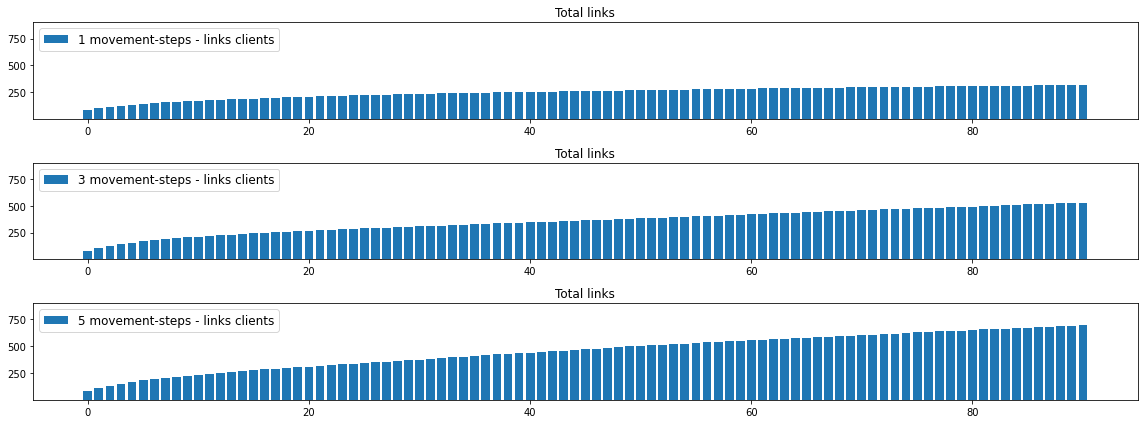

In [72]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['links'], label='{} movement-steps - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,900)
plt.show()

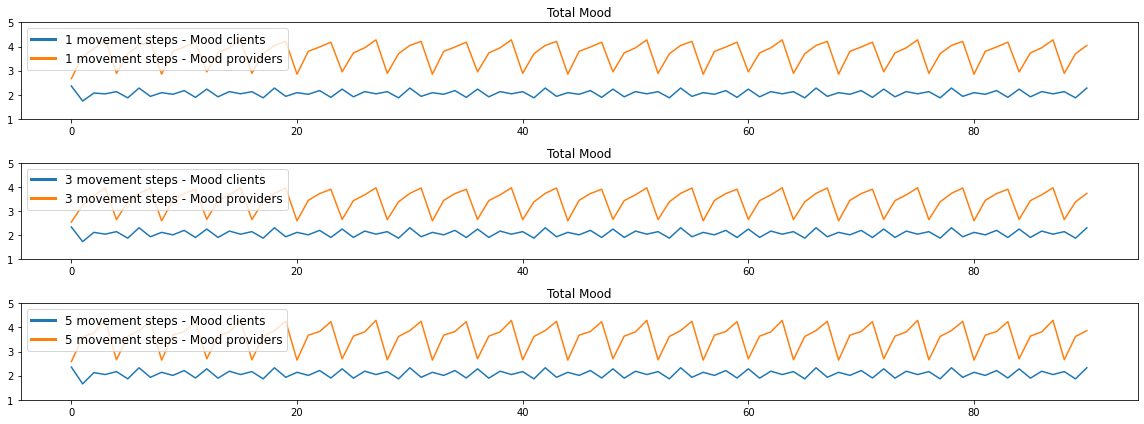

In [57]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['mood_clients'], label='{} movement steps - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['mood_providers'], label='{} movement steps - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



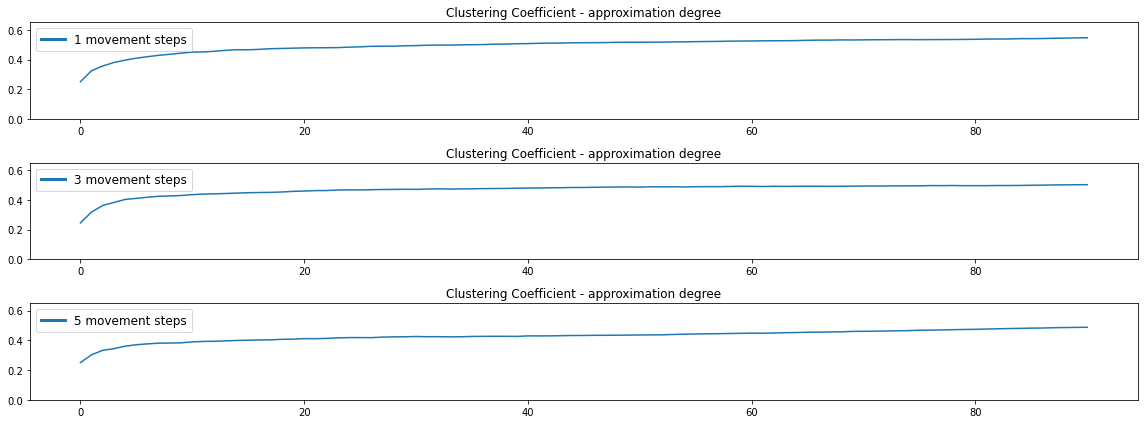

In [58]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['cluster_coef'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



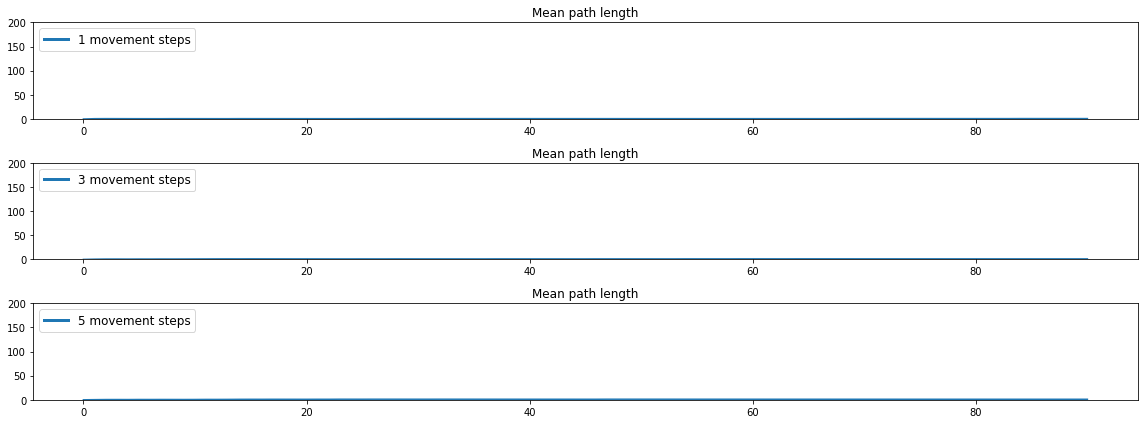

In [59]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['paths'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



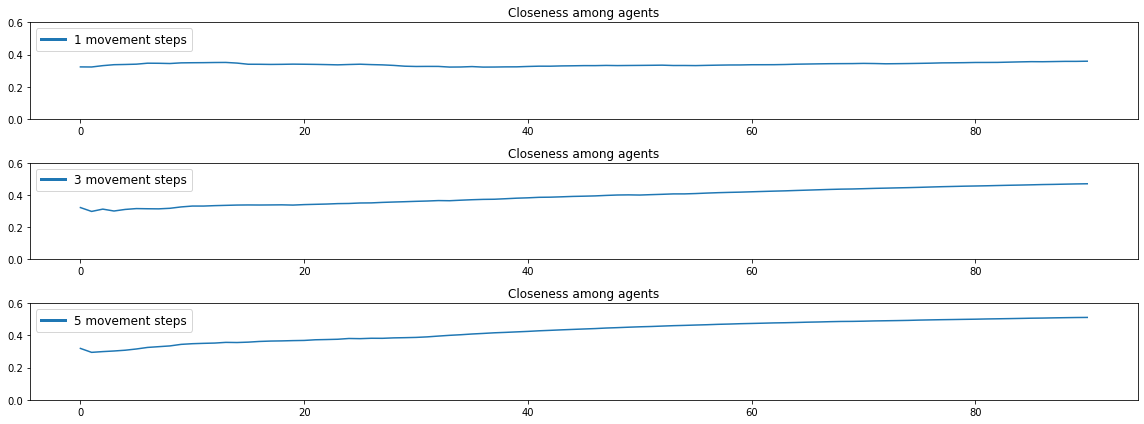

In [60]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['closeness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



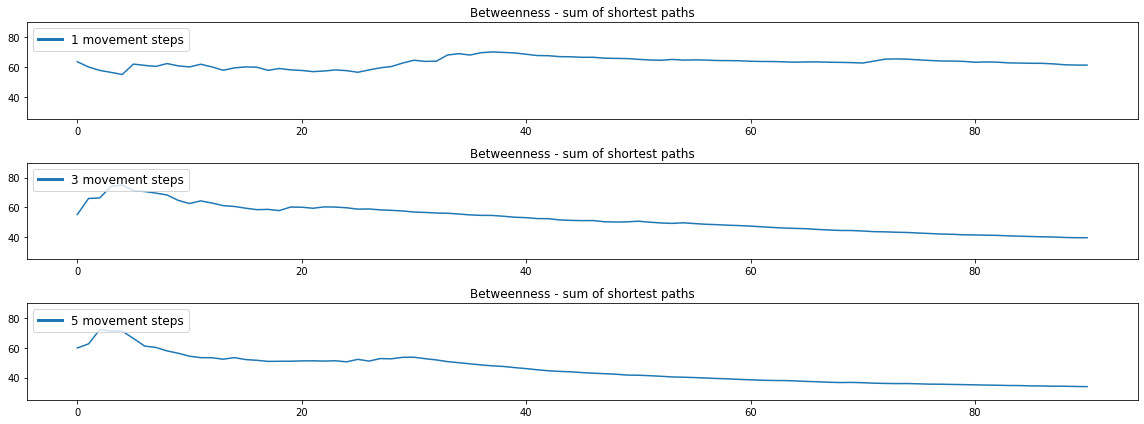

In [61]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['betweenness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(25,90)
plt.show()


In [62]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].mean()

In [63]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1]

,movement-steps,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links,total_mood
0,1,0,2.3662,2.6736,0.2511,0.0000,0.3236,63.5354,0.0000,0.0000,81.7500,5.0398
1,1,1,1.7450,3.5833,0.3252,0.6607,0.3230,59.9885,0.3727,-0.1698,103.6389,5.3283
2,1,2,2.0739,3.9074,0.3568,0.7662,0.3314,57.6990,0.3752,-0.1624,115.7500,5.9813
3,1,3,2.0423,4.2778,0.3804,0.7328,0.3373,56.3802,0.3717,-0.1558,126.0000,6.3201
4,1,4,2.1322,2.8889,0.3961,0.6890,0.3387,54.9601,0.3595,-0.1539,134.5000,5.0211
...,...,...,...,...,...,...,...,...,...,...,...,...
86,1,86,2.1350,3.9491,0.5413,0.8815,0.3557,62.4549,0.3161,0.0107,313.6667,6.0841
87,1,87,2.0423,4.2778,0.5432,0.8799,0.3568,62.0729,0.3127,0.0020,314.8889,6.3201
88,1,88,2.1322,2.8889,0.5443,0.8785,0.3579,61.4934,0.3057,0.0221,316.1389,5.0211
89,1,89,1.8766,3.7037,0.5457,0.8764,0.3579,61.2889,0.3224,-0.0018,317.1944,5.5803


In [64]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [65]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,-0.7733,0.4404
1,mood_providers,1.3884,0.1667
2,cluster_coef,9.9454,0.0
3,paths,-12.2794,0.0
4,closeness,-13.2672,0.0
5,betweenness,16.687,0.0
6,centroid-x,0.1493,0.8815
7,centroid-y,25.8489,0.0
8,links,-11.3806,0.0
9,total_mood,1.262,0.2086


In [66]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,0.598,0.4404
1,mood_providers,1.9278,0.1667
2,cluster_coef,98.9117,0.0
3,paths,150.7832,0.0
4,closeness,176.0173,0.0
5,betweenness,278.4567,0.0
6,centroid-x,0.0223,0.8815
7,centroid-y,668.1633,0.0
8,links,129.5189,0.0
9,total_mood,1.5926,0.2086


In [67]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:45,2:].columns

Index(['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'links', 'total_mood'],
      dtype='object')

In [68]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



ValueError: Length mismatch: Expected axis has 20 elements, new values have 18 elements

In [ ]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients     -0.6308
mood_providers   -0.3526
cluster_coef      0.7808
paths            -0.6039
closeness         0.9847
betweenness       0.8675
total_mood       -0.1331
centroid-x        0.1011
centroid-y       -0.0134
dtype: float64

In [ ]:
df_move.reset_index()

,movement-steps,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,total_mood
0,1,0,2.3662,2.6736,0.2511,0.0000,0.3236,63.5354,0.0000,0.0000,5.0398
1,1,1,1.7450,3.5833,0.3252,0.6607,0.3230,59.9885,0.3727,-0.1698,5.3283
2,1,2,2.0739,3.9074,0.3568,0.7662,0.3314,57.6990,0.3752,-0.1624,5.9813
3,1,3,2.0423,4.2778,0.3804,0.7328,0.3373,56.3802,0.3717,-0.1558,6.3201
4,1,4,2.1322,2.8889,0.3961,0.6890,0.3387,54.9601,0.3595,-0.1539,5.0211
...,...,...,...,...,...,...,...,...,...,...,...
268,5,86,2.1838,3.8125,0.4831,1.1093,0.5077,34.2993,0.1640,-0.2938,5.9963
269,5,87,2.0458,4.2894,0.4849,1.1076,0.5090,34.1531,0.1886,-0.2737,6.3352
270,5,88,2.1673,2.6574,0.4862,1.1062,0.5100,34.1194,0.1490,-0.2383,4.8247
271,5,89,1.8678,3.6227,0.4871,1.1047,0.5110,33.9601,0.1685,-0.1813,5.4904


KeyError: 'links'

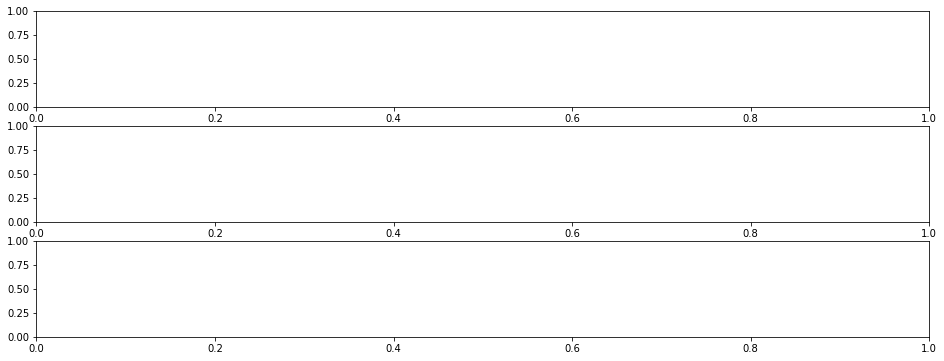

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['links'], label='{} movement-steps - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,1000)
plt.show()

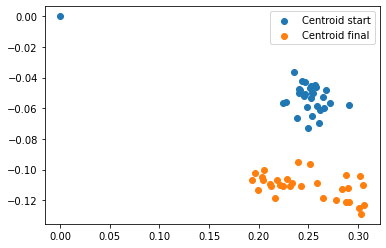

In [ ]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

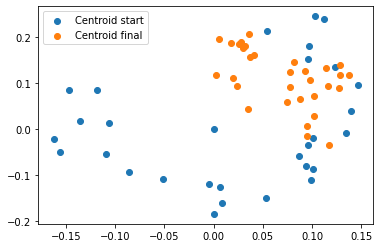

In [ ]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [ ]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef   paths  \
movement-steps step                                                       
1              0           2.3482          2.4676        0.2531  0.0000   
               1           1.7273          3.2778        0.3173  0.6409   
               2           2.0888          3.4329        0.3589  0.5896   
               3           2.0578          4.0370        0.3770  0.8786   
               4           2.1174          2.5000        0.3952  0.9630   
...                           ...             ...           ...     ...   
5              86          2.2079          3.7014        0.4844  1.0647   
               87          2.0824          4.1343        0.4854  1.0630   
               88          2.1987          2.7755        0.4878  1.0613   
               89          1.9232          3.4699        0.4887  1.0584   
               90          2.3413          3.7755        0.4912  1.0572   

                     closeness  betweenness  centroid-x  centroid-y  \
movement-steps step                                                   
1              0        0.3260      50.6403      0.0000      0.0000   
               1        0.3302      51.4378      0.2352     -0.0366   
               2        0.3480      49.8236      0.2437     -0.0421   
               3        0.3427      56.0576      0.2420     -0.0480   
               4        0.3495      53.9913      0.2549     -0.0501   
...                        ...          ...         ...         ...   
5              86       0.5053      33.8017      0.0172      0.1873   
               87       0.5063      33.7826      0.0058      0.1953   
               88       0.5074      33.6087      0.0409      0.1605   
               89       0.5087      33.3868      0.0818      0.1470   
               90       0.5096      33.2663      0.1284      0.1400   

                     total_mood  
movement-steps step              
1              0         4.8158  
               1         5.0050  
               2         5.5216  
               3         6.0949  
               4         4.6174  
...                         ...  
5              86        5.9093  
               87        6.2166  
               88        4.9742  
               89        5.3932  
               90        6.1168  

[273 rows x 9 columns]

/tmp/ipykernel_270896/1052004845.py:48: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


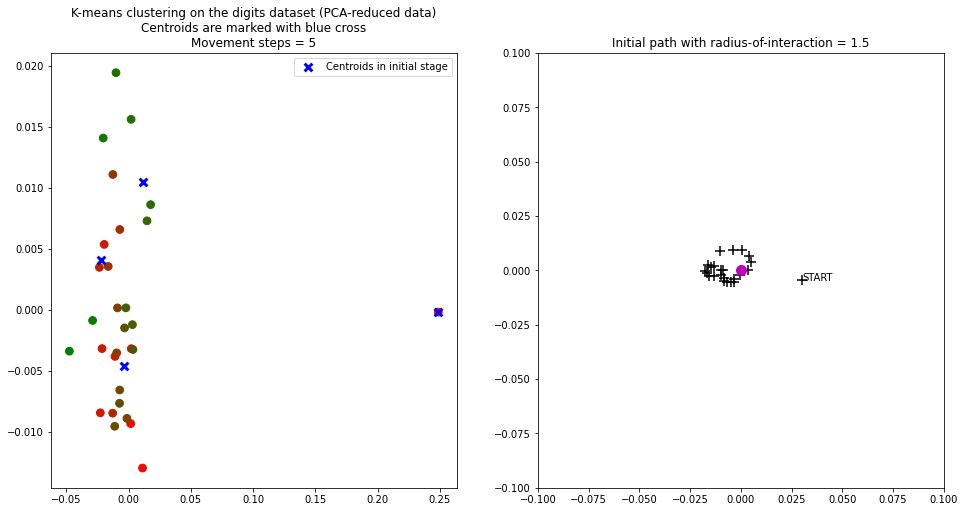

In [ ]:
lag=7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()



plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)

plt.scatter(0,0,marker='o',s=100,color='m')


plt.show()

In [ ]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape

(91, 11)

/tmp/ipykernel_270896/112140767.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


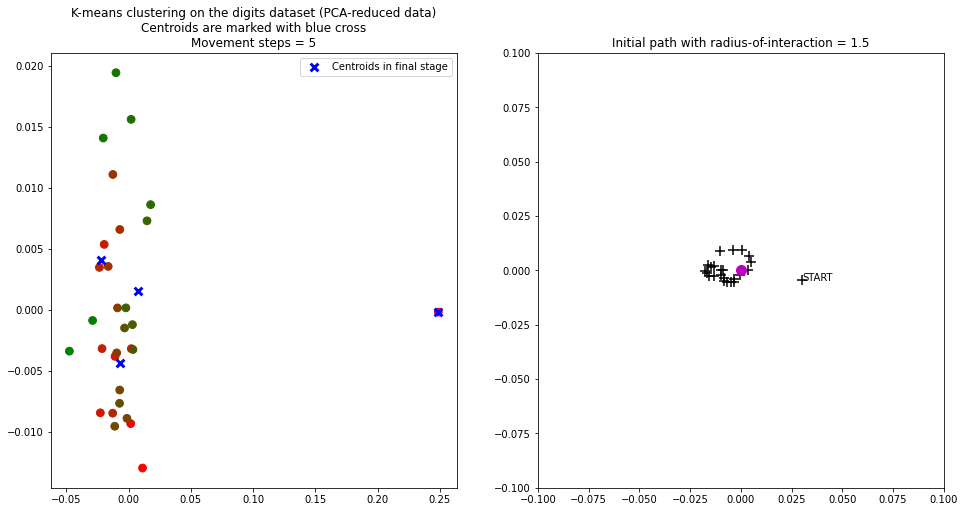

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_270896/2926621981.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


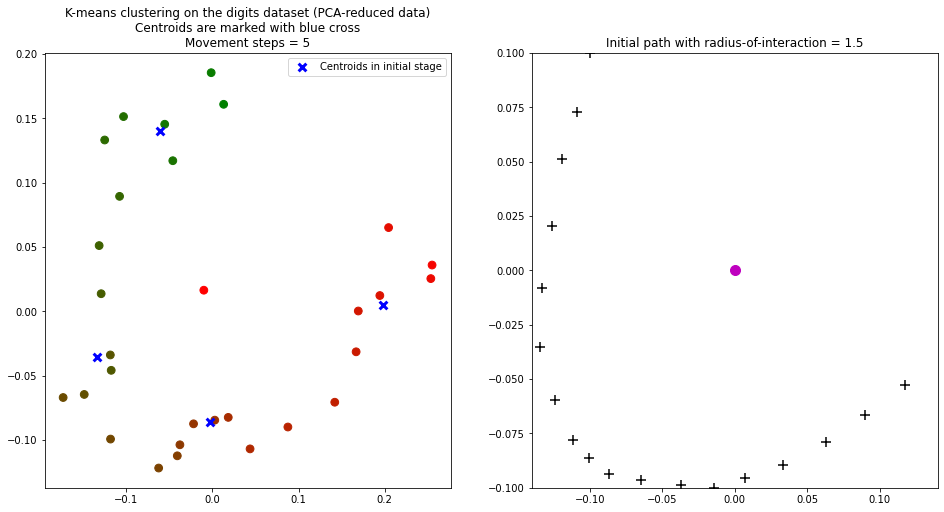

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.14,0.14)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_270896/1187996117.py:44: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


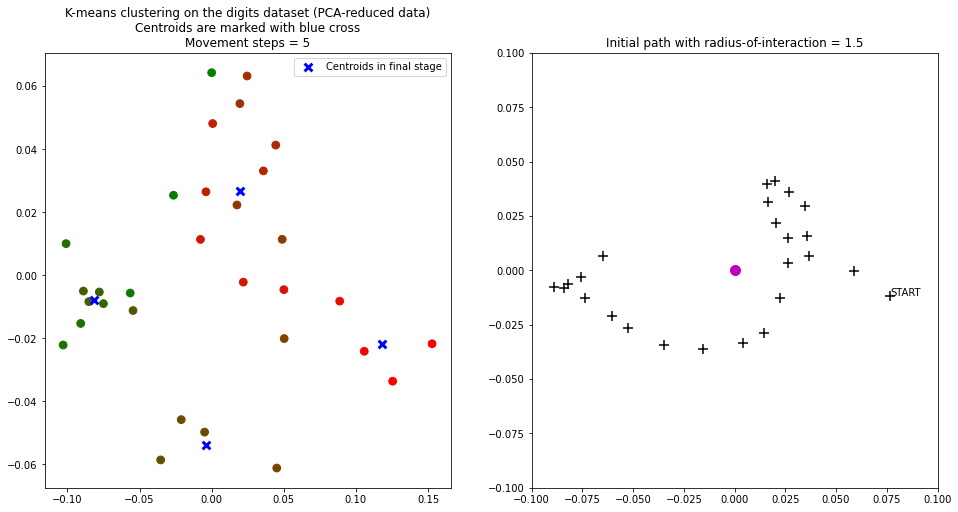

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[60:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=30
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()